# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import cufflinks as cf 

In [51]:
matches = pd.read_csv('matches.csv')
players = pd.read_csv('players.csv')
winners = pd.read_csv('winners.csv') 

In [52]:
matches = matches.dropna()
players = players.dropna()
winners = winners.dropna()
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [53]:
matches['Home Team Name'].value_counts()

Brazil                       82
Italy                        57
Argentina                    54
Germany FR                   43
England                      35
                             ..
rn">Serbia and Montenegro     1
Ukraine                       1
Iran                          1
rn">United Arab Emirates      1
rn">Trinidad and Tobago       1
Name: Home Team Name, Length: 78, dtype: int64

In [54]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Bosnia and Herzegovina    1
rn">Trinidad and Tobago       1
rn">United Arab Emirates      1
rn">Serbia and Montenegro     1
Name: Home Team Name, dtype: int64

In [55]:
wrongs = list(names.index)
wrongs

['rn">Republic of Ireland',
 'rn">Bosnia and Herzegovina',
 'rn">Trinidad and Tobago',
 'rn">United Arab Emirates',
 'rn">Serbia and Montenegro']

In [56]:
corrects = [name.split('>')[1] for name in wrongs]
corrects

['Republic of Ireland',
 'Bosnia and Herzegovina',
 'Trinidad and Tobago',
 'United Arab Emirates',
 'Serbia and Montenegro']

In [57]:
matches['Home Team Name'].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

In [58]:
for index, wr in enumerate(wrongs):
    matches = matches.replace(wrongs[index], corrects[index])
for index, wr in enumerate(wrongs):
    winners = winners.replace(wrongs[index], corrects[index])

In [59]:
matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name']

Series([], Name: Home Team Name, dtype: object)

In [60]:
players.tail()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37658,255955,300186490,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O96'
37693,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90'
37694,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2'
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3'
37715,255957,300186502,NED,Louis VAN GAAL (NED),N,22,VORM,GK,I90'


In [61]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [62]:
winners['Attendance'] = winners['Attendance'].str.replace('.', '').astype('int64')
winners.replace('Germany FR', 'Germany')

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [63]:
winners.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


**Most Number of World Cup Winning Title**

In [64]:
most_winner_titles = winners['Winner'].value_counts()
most_winner_titles

Brazil        5
Italy         4
Germany FR    3
Argentina     2
Uruguay       2
France        1
Spain         1
England       1
Germany       1
Name: Winner, dtype: int64

In [65]:
runner_ups = winners['Runners-Up'].value_counts()
runner_ups

Netherlands       3
Germany FR        3
Argentina         3
Hungary           2
Brazil            2
Italy             2
Czechoslovakia    2
France            1
Germany           1
Sweden            1
Name: Runners-Up, dtype: int64

In [66]:
thirds = winners['Third'].value_counts()
thirds

Germany        3
Poland         2
Brazil         2
Sweden         2
France         2
Croatia        1
Turkey         1
Austria        1
Italy          1
USA            1
Germany FR     1
Chile          1
Netherlands    1
Portugal       1
Name: Third, dtype: int64

In [67]:
teams = pd.concat([most_winner_titles, runner_ups, thirds], axis=1)
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany FR,3,3,1
Argentina,2,3,0
Uruguay,2,0,0
France,1,1,2
Spain,1,0,0
England,1,0,0
Germany,1,1,3
Netherlands,0,3,1


In [68]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

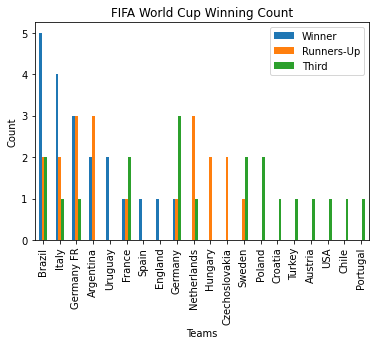

In [69]:
teams.plot(kind = 'bar', title='FIFA World Cup Winning Count', xlabel='Teams', ylabel='Count')

**Number of Goal Per Countary**

In [70]:
matches.head(2)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [71]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [72]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [73]:
goals = home.append(away, ignore_index = True)


In [74]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [75]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
...,...
Canada,0.0
Trinidad and Tobago,0.0
China PR,0.0


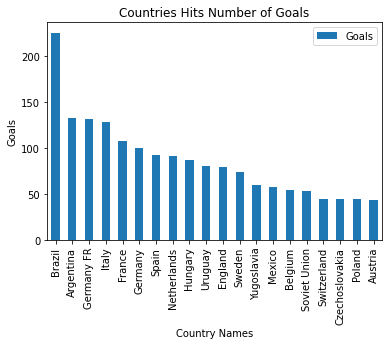

In [76]:
goals[:20].plot(kind='bar', xlabel = 'Country Names', ylabel = 'Goals', title = 'Countries Hits Number of Goals')

**Attendance, Number of Teams, Goals, and Matches per Cup**

In [77]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


Text(0.5, 1.0, 'Matches Plyed Scored by Teams Per Year')

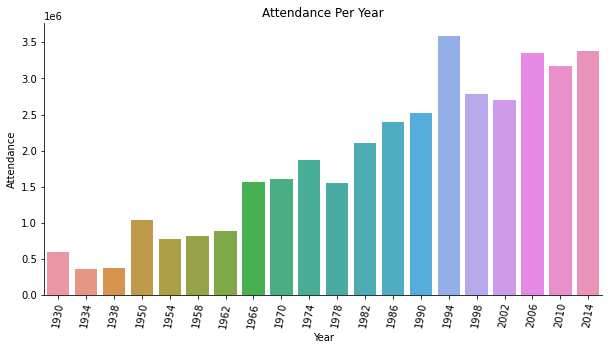

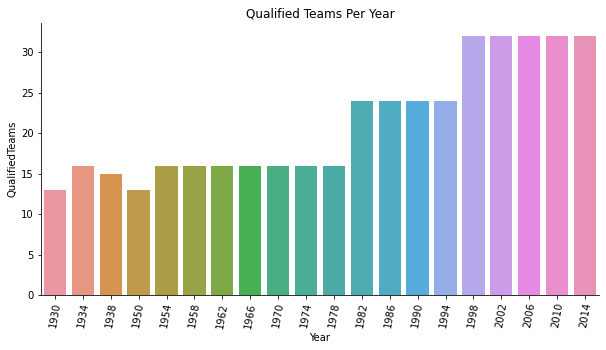

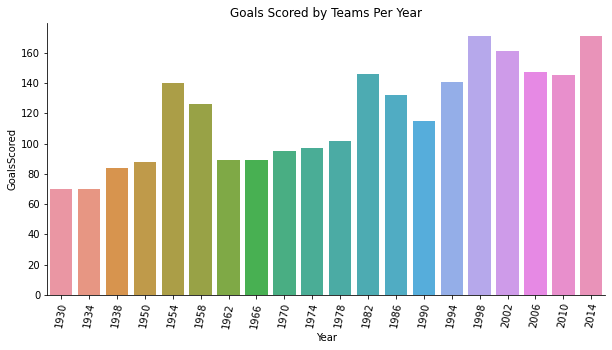

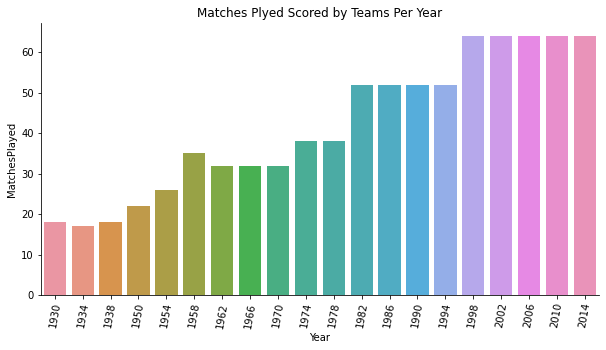

In [78]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')

#==========================================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

#==========================================

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')


#==========================================


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = winners)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Plyed Scored by Teams Per Year')

**Goals Per Team Per World Cup**

In [79]:
matches.head(2)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [80]:
home = matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [81]:
away = matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [82]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [83]:
goals = goals.reset_index()

In [84]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [85]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [89]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [87]:
x, y = goals['Year'].values, goals['Goals'].values


In [88]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()


**Matches With Heihest Number Of Attendance**

In [90]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

In [91]:
matches['Datetime'] = matches['Datetime'].apply(lambda x: x.strftime('%d %b, %y'))

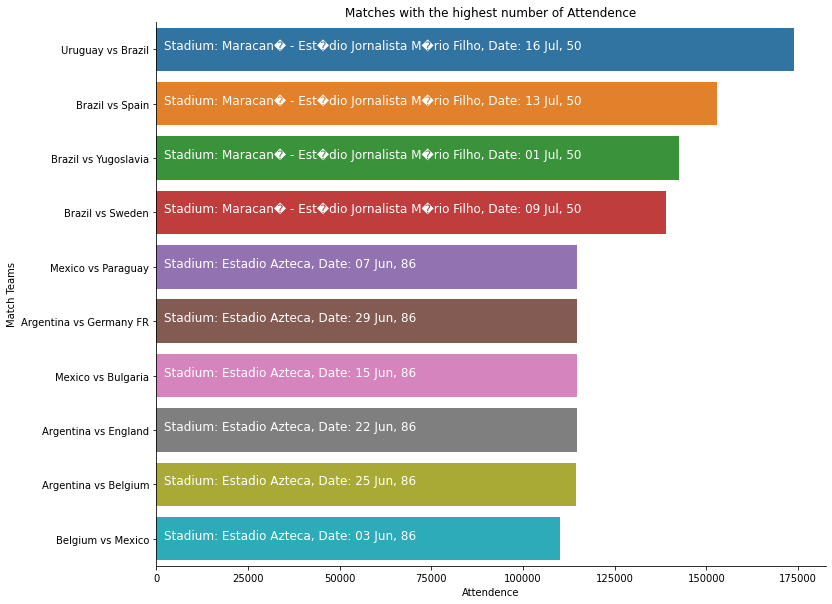

In [92]:
top10 = matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

**Stadium with Highest Average Attendance**

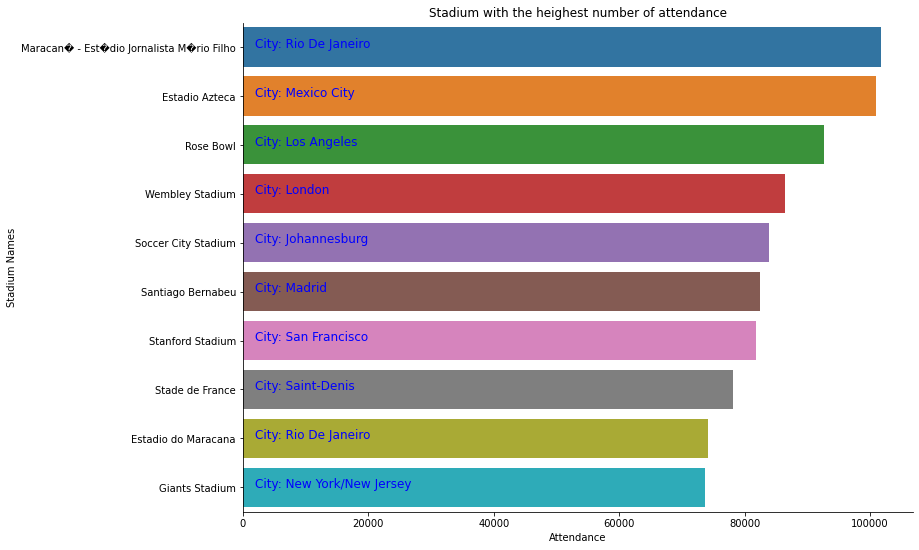

In [93]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')
        
plt.show()

**Which countries had won the cup ?**

Text(0.5, 1.0, 'Number of podium by country')

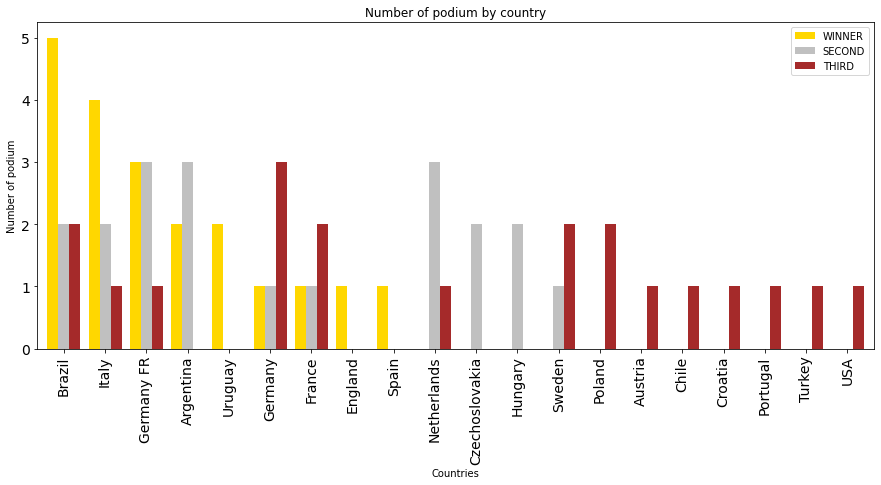

In [95]:
gold = winners["Winner"]
silver = winners["Runners-Up"]
bronze = winners["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
podium_count = podium_count.astype('int64')
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8, align='center')
plt.xlabel('Countries')
plt.ylabel('Number of podium')
plt.title('Number of podium by country')

**Number of goal per country**

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

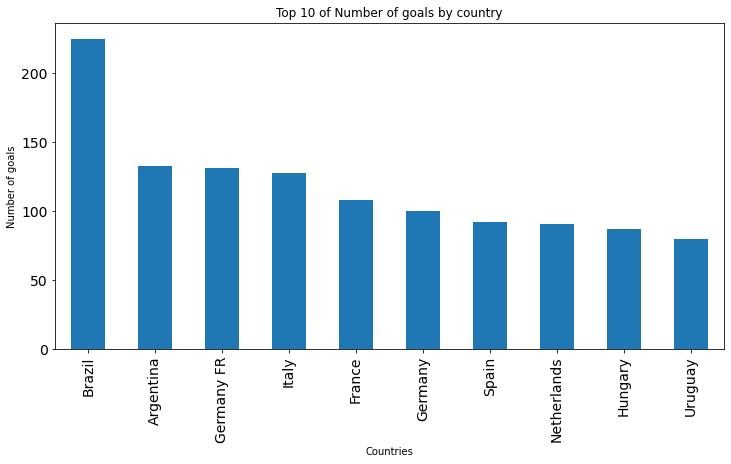

In [97]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

goal_per_country[:10].plot(x=goal_per_country.index, y=goal_per_country.values, kind="bar", figsize=(12, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')